In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%cd /data/Jiang_Lab/Data/MT-TS-Net/code

/gpfs/gsfs11/users/Jiang_Lab/Data/MT-TS-Net/code


In [3]:
# parameters# load data
import pandas as pd
from semanticseg_data import SemanticSegData
import torch

mpp=0.25
patch_size=224
num_patch=1500
num_img_channel=3
num_workers=8
color_norm=True
stat_norm_scheme='pretrained'
reference_filename='/data/Jiang_Lab/Data/MT-TS-Net/code/reference_patch_224.pkl'
data = pd.read_csv('/data/Jiang_Lab/Data/tcga-brca-semantic-seg/semantic_seg_data.csv', delimiter=',')
dataset = SemanticSegData(data, mpp, patch_size, num_patch, num_workers, color_norm, stat_norm_scheme, reference_filename)
ds = torch.utils.data.DataLoader(dataset,batch_size=1, num_workers=num_workers, shuffle=False)
ds_iter = iter(ds)

In [4]:
sematic_dict = { 0: 'outside_roi', 1: 'tumor', \
                2: 'stroma', 3: 'lymphocytic_infiltrate', \
                4: 'necrosis_or_debris', 5: 'glandular_secretions', \
                6: 'blood', 7: 'exclude', \
                8: 'metaplasia_NOS', 9: 'fat', \
                10: 'plasma_cells', 11: 'other_immune_infiltrate', \
                12: 'mucoid_material', 13: 'normal_acinus_or_duct', \
                14: 'lymphatics', 15: 'undetermined', \
                16: 'nerve', 17: 'skin_adnexa', \
                18: 'blood_vessel', 19: 'angioinvasion', \
                20: 'dcis', 21: 'other' }

In [5]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

mpl.rcParams['figure.figsize'] = [15,15]

def visualize_patchs(patches):
    patches = patches.permute(0, 2, 3, 1)
    patches = (patches - patches.min().item())/patches.max().item()
    plt.subplot(141)
    plt.imshow(patches[0])
    plt.axis('off')
    plt.subplot(142)
    plt.imshow(patches[1])
    plt.axis('off')
    plt.subplot(143)
    plt.imshow(patches[2])
    plt.axis('off')
    plt.subplot(144)
    plt.imshow(patches[3])
    plt.axis('off')

In [6]:
sematic_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

1
tumor
torch.Size([930, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2
stroma
torch.Size([642, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3
lymphocytic_infiltrate
torch.Size([963, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4
necrosis_or_debris
torch.Size([110, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9
fat
torch.Size([10, 3, 224, 224])


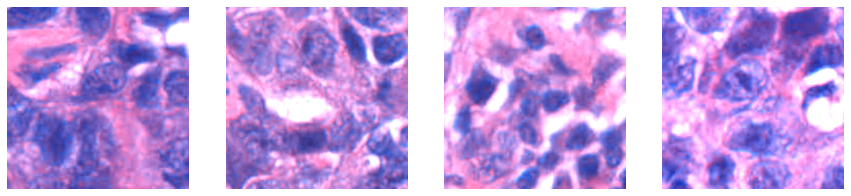

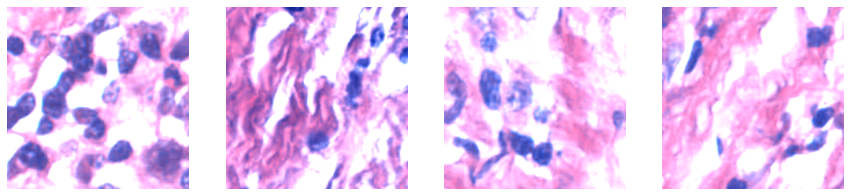

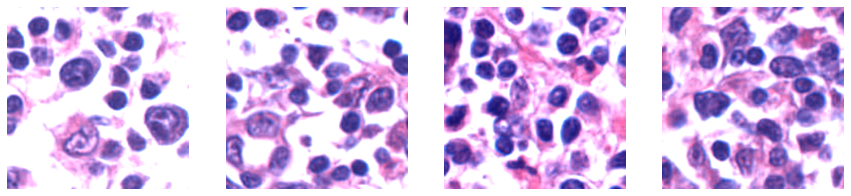

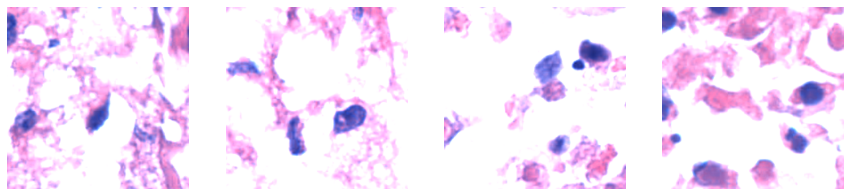

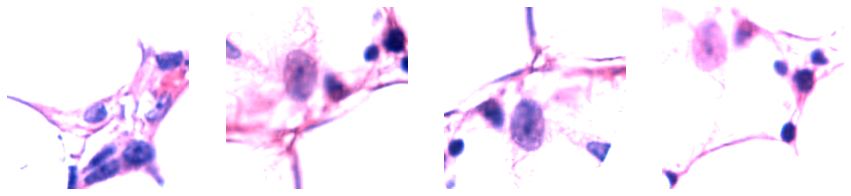

In [7]:
for _sem in sematic_dict.keys():
    data_dict = next(ds_iter)
    image = data_dict['image']
    semantic_seg = data_dict['semantic_seg']
    _idx = (semantic_seg*255 ==_sem)
    if _idx.sum()> 4:
        num_images = image.shape[0]
        image = torch.reshape(image, (num_images*num_patch, num_img_channel, patch_size, patch_size))
        print(_sem)
        print(sematic_dict[_sem])
        _img = image[_idx.flatten(),:,:,:]
        print(_img.shape)
        figure(_sem+1)
        visualize_patchs(_img)